In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [14]:
# define state
class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float
    category: str

In [8]:
def calculate_bmi(state: BMIState) -> BMIState:
    """Calculate BMI based on weight and height."""
    weight = state['weight']
    height = state['height']
    bmi=weight / (height ** 2)
    state['bmi'] = bmi
    return state

In [15]:
def calculate_category(state: BMIState) -> BMIState:
    """Determine BMI category based on calculated BMI."""
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    return state

In [16]:
# define your graph
graph=StateGraph(BMIState)

# define your nodes
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('calculate_category', calculate_category)

# define your edges
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'calculate_category')
graph.add_edge('calculate_category', END)

# compile the graph
workflow=graph.compile()

In [20]:
# execute the graph
output_state=workflow.invoke({'weight': 80, 'height': 1.75})
print(output_state)

{'weight': 80, 'height': 1.75, 'bmi': 26.122448979591837, 'category': 'Overweight'}


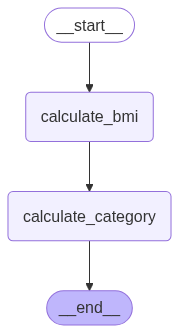

In [21]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())